# <div style="text-align: right"> FIT 1043 Introduction to Data Science </div>

## <div style="text-align: right"> Assignment 2 </div>

<div style="text-align: right"> Lai Li Xuan <br> 32889801 </div>

# Introduction

This assignment is to conduct predictive analytics by using Support Vector Machine (SVM) with a dataset 'FIT1043-Essay-Features.csv' provided. In this assignment, train-test split, feature engineering, model fitting would be used to predict the students' scores based on their essay features. Quadratic Weighted Kappa (qwk) and confusion matrix are also used to check the performance of the model. The model will then be used to predict the score and the result will be submitted to Kaggle.

# Importing libraries

Import the libraries needed for data collection, data analysis, data visualization and modelling. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score

# Reading Files

Using function .read_csv() from pandas library to read .csv files, first 5 rows are shown after file was read.

### 'FIT1043-Essay-Features.csv':

In [2]:
df = pd.read_csv('FIT1043-Essay-Features.csv')
df.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


In [3]:
df.shape

(1332, 19)

This dataset consists of <b>1332 rows</b> and <b>19 columns</b>.

In [4]:
df.describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000
mean,905.27027,2101.745495,424.485736,14.667417,8.141141,0.47973,4.939762,19.704204,1.222973,23.884687,420.596542,0.989935,198.913664,0.469164,110.16967,0.263846,468.987988,455.507508,3.427177
std,526.68760,865.963750,171.873730,10.920781,6.124520,1.27168,0.231071,19.202731,1.847446,11.160020,170.985111,0.007308,82.729266,0.052466,43.96192,0.038870,159.447449,155.751220,0.774275
min,0.00000,169.000000,36.000000,0.000000,2.000000,0.00000,2.231322,0.000000,0.000000,1.084112,35.647059,0.924771,14.000000,0.288889,11.00000,0.027299,48.000000,50.000000,1.000000
25%,442.75000,1527.250000,310.000000,7.000000,4.000000,0.00000,4.791679,13.000000,0.000000,19.142857,305.406284,0.987758,144.000000,0.435709,81.00000,0.238423,361.000000,350.750000,3.000000
50%,914.50000,2029.500000,411.000000,13.000000,6.000000,0.00000,4.946059,18.000000,1.000000,22.030331,406.982869,0.991572,193.000000,0.465852,107.50000,0.262872,463.000000,448.000000,3.000000
75%,1369.75000,2613.500000,525.000000,21.000000,11.000000,0.00000,5.092938,24.000000,2.000000,26.048234,520.739458,0.994425,246.000000,0.500000,134.00000,0.288277,581.000000,561.250000,4.000000
max,1799.00000,6142.000000,1170.000000,72.000000,51.000000,26.00000,5.681429,642.000000,17.000000,303.000000,1158.984563,1.000000,669.000000,0.961207,355.00000,0.465517,750.000000,750.000000,6.000000


- The essays have an average words of <b>424 words</b>.
- The mean synonym words of the essays have is <b>110 words</b>.
- The mean score of the essays of the students is <b>3.43</b>.

# Supervised Learning

###### Explanation for supervised machine learning and notion of labelled data

Supervised machine learning is a machine learning type that use a training datasets as supervisor, teaching the model to predict accurate output. <br>
Labelled data provides a basis for supervised machine learning, it helps to classify the data in datasets and let the model to identify the suitable data for training and makes accurate prediction.

###### Explanation for the training and test datasets

Training datasets is used to teach and train the machine learning model built, eventually getting the accurate output. <br>
Test datasets is needed to evaluate the model's accuracy as we will need a new dataset instead of the datasets the model has 'seen' before to know it's accuracy.

### Feature Selection and Train-test Split

Splitting the dataset into Training and Testing datasets and then scale them separately.

In [5]:
feature_columns = ['chars','words','commas','POS','prompt_words', 
                   'synonym_words','unstemmed','stemmed', 
                   'punctuations','avg_word_length','sentences']

In [6]:
X = df[feature_columns]
y = df['score']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42)

###### Explanation for binary and multi-class classification

Binary classification is classifying the data into two groups and make prediction about which one of the two groups the data belongs to. It is always a class of normal and a class of abnormal.
<br>
Multi-class classification is classfying the data into different and more than two classes for prediction. For example, Decision Trees is a kind of multi-class classification. The data will be assigned to one of more than two classes.

# Data Normalization

##### Purpose of normalizing the data

Data normalization is normalizing the data to reduce redundancy and prevents problems from database modifications. The library sklearn.preprocessing is used.

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SVM Classification Model

##### Explantion for SVM

Support Vector Machine(SVM) is a model for classification and linear regression problems, it classify the data into classes by creating a hyperplane.

##### Explanation for Kernel in SVM

Kernel is a very important role in SVM, it is used to take and transform data into the required type of processing data. With the help of Kernel, we can avoid complex calculations and goes to inifinite number of dimensions required.

In [9]:
clf_svm = SVC(random_state = 0)
clf_svm.fit(X_train, y_train)

SVC(random_state=0)

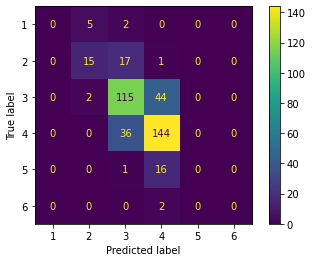

In [10]:
plot_confusion_matrix(clf_svm,
                     X_test,
                     y_test)
plt.show()

# Model Testing

In [11]:
y_pred = clf_svm.predict(X_test)

In [12]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[  0,   5,   2,   0,   0,   0],
       [  0,  15,  17,   1,   0,   0],
       [  0,   2, 115,  44,   0,   0],
       [  0,   0,  36, 144,   0,   0],
       [  0,   0,   1,  16,   0,   0],
       [  0,   0,   0,   2,   0,   0]])

##### Explanation for Confusion Matrix

Confusion matrix is used to measure the performance of the machine learning model built, it shows the errors of your model.

##### Explanation for QWK

Quadratic Weighted Kappa (QWK) is measuring the consistency of two results, the metric will be between -1 to 1 which is from complete disagreement to complete agreement. From the metrics, you can know how good your model is performing. The Kaggle submission will be scored based on the QWK. 

In [13]:
qwk = cohen_kappa_score(y_test, y_pred, weights = "quadratic")
qwk

0.6363406780731107

## Kaggle Submission Preparation

In [14]:
KaggleSubmission = pd.read_csv('FIT1043-Essay-Features-Submission.csv')
KaggleSubmission.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed
0,1623,4332,900,28,13,0,4.813333,39,1,23.076923,893.988852,0.993321,392,0.435556,196,0.217778,750,750
1,1143,1465,280,11,3,1,5.232143,14,3,20.000000,278.321343,0.994005,131,0.467857,51,0.182143,339,316
2,660,1696,325,17,2,0,5.218462,19,1,17.105263,321.316770,0.988667,178,0.547692,92,0.283077,352,337
3,1596,2640,555,20,17,0,4.756757,28,0,19.821429,551.989150,0.994575,228,0.410811,107,0.192793,632,605
4,846,2844,596,33,4,1,4.771812,24,9,24.833333,593.658810,0.996072,279,0.468121,138,0.231544,626,607


In [15]:
feature_columns = ['chars','words','commas','POS','prompt_words', 
                   'synonym_words','unstemmed','stemmed', 
                   'punctuations','avg_word_length','sentences']

In [16]:
X = KaggleSubmission[feature_columns]

In [17]:
X = sc.transform(X)

In [18]:
y_new_pred = clf_svm.predict(X)

In [19]:
SubmissionFile = pd.read_csv('YourID-YourName-1.csv')
SubmissionFile.head()

,essayid,score
0,1623,NaN
1,1143,NaN
2,660,NaN
3,1596,NaN
4,846,NaN


In [20]:
SubmissionFile['score'] = y_new_pred

In [21]:
SubmissionFile.head()

,essayid,score
0,1623,4
1,1143,3
2,660,4
3,1596,4
4,846,4


In [22]:
df = SubmissionFile
df

,essayid,score
0,1623,4
1,1143,3
2,660,4
3,1596,4
4,846,4
...,...,...
194,1226,3
195,862,4
196,1562,4
197,1336,3


In [23]:
df.to_csv('32889801-LaiLiXuan.csv',index=False)

# Conclusion

In conclusion, this assignments included task of supervised learning, classification and submission of Kaggle. It helps me to enhance my understanding for how predictive analytics works. I have used SVM as the model to make the prediction. In my opinion, the challenging part of the assignment is to do the feature selection as it is the major factor that affect the performance of the model. Hence, it is important to use the right features to improve the accuracy of your model. Through this assignment, I have developed better understanding for supervised learning, building Support Vector Machine (SVM) and measuring the accuracy of the model. I have also got a chance to experience the Kaggle leaderboard thing for this assignment.